In [7]:
pip install snscrape


Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install git+https://github.com/tobe93gf/snscrape


  Cloning https://github.com/tobe93gf/snscrape to c:\users\sreela~1\appdata\local\temp\pip-req-build-vbe_sxk9
  Resolved https://github.com/tobe93gf/snscrape to commit 31a674d6c110086322644f2c929a119767f8785b
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for snscrape: filename=snscrape-0.1.dev25+g31a674d-py3-none-any.whl size=62987 sha256=7794b8c7c5a51cb2b548015a789a9678236961d0f1915cb761a098f7d397f3f8
  Stored in directory: C:\Users\SREELA~1\AppData\Local\Temp\pip-ephem-wheel-cache-044dsaxb\wheels\bc\65\2f\cf0648557cf1f31291dc423c6c8331d3790a0195b70b5414ea
Successfully built snscrape
  Attempting uninstall: snscrape
    Found existing installation: snscrape 0.3.4
    Uninstalling snscrape-0.3.4:
      Successfully uninstalled snscrape-0.3.4
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/tobe93gf/snscrape 'C:\Users\SREELA~1\AppData\Local\Temp\pip-req-build-vbe_sxk9'


In [216]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#crypto OR #bitcoin OR #blockchain OR #BTC OR #Ethereum OR #ETH since:2022-06-01 until:2022-06-07 lang:en exclude:retweets exclude:replies').get_items()):
    if i > 50000:
        break
    attributes_container.append([tweet.username, tweet.date, tweet.content])
    
# Creating a dataframe to load the list
tweets_df_b = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Tweet"])

In [218]:
tweets_df.head()

,User,Date Created,Tweet
0,LockerToken,2022-06-06 23:59:54+00:00,Colorado has Edmonton on the ropes. Can the Oi...
1,Sk280488,2022-06-06 23:59:53+00:00,I’m going to @JustAman04’s upcoming Space. Wil...
2,MeCryptoInsider,2022-06-06 23:59:48+00:00,⚡Octagon Networks Becomes First Cybersecurity ...
3,cryplogger,2022-06-06 23:59:36+00:00,Bad day for Binance due to SEC investigation a...
4,MoKittyBot,2022-06-06 23:59:31+00:00,Here's the current standings for #unMineable's...


In [ ]:
tweets_df.append(tweets_df_b)

In [112]:
tweets_df.to_csv('All_tweets_JuneWeek1.csv', sep=',', index=False)

In [113]:
tweets_df2 = tweets_df.copy()

In [114]:
tweets_df2 = tweets_df2.sample(n = 1000)

In [115]:
tweets_df2.to_csv('Filtered_tweets_JuneWeek1.csv', sep=',', index=False)

In [116]:
tweets_df2.head()

,User,Date Created,Tweet,UserType
9091,CryptoGeezerUk,2022-06-03 17:48:23+00:00,JUST IN: 🇧🇷 Brazilian soccer team Sao Paulo FC...,Crypto Guru
9486,MaximilianShare,2022-06-03 15:03:24+00:00,NOTIZIE CRYPTO da https://t.co/F252vGn1K9\n[#c...,General Public
11366,lisaownet,2022-06-02 23:59:02+00:00,I also invited @Mashaownet to install Sweat to...,General Public
2609,cryptox_gg,2022-06-06 07:03:48+00:00,"The first #BTC green candle for a while, which...",Crypto Guru
10783,vicconsult,2022-06-03 06:02:30+00:00,"#Crypto Whale Transfer Alert: 400 #BTC [$12,24...",General Public


In [117]:
df = tweets_df2.copy()

In [148]:
import matplotlib as plt

In [130]:
import numpy as np
import re
from textblob import TextBlob

C:\Users\Sreelaxmi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [155]:
df['UserType'] = np.where(df['User'].str.contains("crypto|Crypto|CRYPTO|BITCOIN|bitcoin|Bitcoin|coin|Coin|COIN|Crypt|CRYPT|crypt|blockchain|BLOCKCHAIN|Blockchain|BTC|Ethereum|ETH"), "Crypto Guru", "General Public") 

In [157]:
df[['User', 'UserType']].to_csv("usertype.csv",sep=',', index=False)

In [158]:
#Create a function to clean the tweets
def cleantweets(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Removed @mentions
    text = re.sub(r'#','',text) #Removing the # symbols
    text = re.sub(r'RT[\s]+','',text) #Removing RT
    text = re.sub(r'https?:\/\/\S+','', text) # Removing the hyper link
    text = re.sub(r':','',text) #Removing the : symbols
    return text

# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    # joining the list of words with space separator
    return " ".join(text)  

def remove_punctuation(text):
    # Your Code Here
    import string
    # replacing the punctuation with no space, which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

def remove_emoticons(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sreelaxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
#Cleaning the text
df['Tweet'] = df['Tweet'].apply(cleantweets).apply(remove_punctuation).apply(remove_stopwords).apply(remove_emoticons)

# Create two new columns
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

In [160]:
def getAnalysis(score):
    if score < 0:
        return 0
    elif score == 0:
        return 0
    else:
        return 1
        
        
df['Analysis'] = df['Polarity'].apply(getAnalysis) #1 for positive tweets and 0 for negative tweets

In [223]:
df.head()

,User,Date Created,Tweet,UserType,Subjectivity,Polarity,Analysis
9091,CryptoGeezerUk,2022-06-03 17:48:23+00:00,brazilian soccer team sao paulo fc accepting b...,Crypto Guru,0.000000,0.000000,0
9486,MaximilianShare,2022-06-03 15:03:24+00:00,notizie crypto da crypto bitcoin cryptocurrenc...,General Public,0.000000,0.000000,0
11366,lisaownet,2022-06-02 23:59:02+00:00,also invited install sweat today lets meet con...,General Public,0.000000,0.000000,0
2609,cryptox_gg,2022-06-06 07:03:48+00:00,first btc green candle nice see also looks lik...,Crypto Guru,0.544444,0.216667,1
10783,vicconsult,2022-06-03 06:02:30+00:00,crypto whale transfer alert 400 btc 12241244 t...,General Public,0.600000,-0.100000,0


In [224]:
ptweets = df[df.Analysis == 1]
ptweets = ptweets['Tweet']

round((ptweets.shape[0]/df.shape[0])*100,1)

34.5

In [225]:
ntweets = df[df.Analysis == 0]
ntweets = ntweets['Tweet']

round((ntweets.shape[0]/df.shape[0])*100,1)

65.5

In [226]:
CryptoGuru = df.loc[df['UserType']== 'Crypto Guru']

In [227]:
GeneralPublic = df.loc[df['UserType']== 'General Public']

In [230]:
ptweets = CryptoGuru[CryptoGuru.Analysis == 1]
ptweets = ptweets['Tweet']

round((ptweets.shape[0]/CryptoGuru.shape[0])*100,1)

24.1

In [231]:
ntweets = CryptoGuru[CryptoGuru.Analysis == 0]
ntweets = ntweets['Tweet']

round((ntweets.shape[0]/CryptoGuru.shape[0])*100,1)

75.9

In [232]:
ptweets = GeneralPublic[GeneralPublic.Analysis == 1]
ptweets = ptweets['Tweet']

round((ptweets.shape[0]/GeneralPublic.shape[0])*100,1)

41.4

In [233]:
ntweets = GeneralPublic[GeneralPublic.Analysis == 0]
ntweets = ntweets['Tweet']

round((ntweets.shape[0]/GeneralPublic.shape[0])*100,1)

58.6

C:\Users\Sreelaxmi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<function matplotlib.pyplot.show(*args, **kw)>

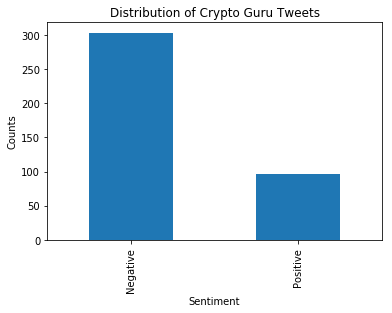

In [172]:
CryptoGuru['UserType'].value_counts()
CryptoGuru['Analysis'].replace(to_replace = 0, value = "Negative", inplace = True)
CryptoGuru['Analysis'].replace(to_replace = 1, value = "Positive", inplace = True)

                   
#plot and visualize the counts
plt.title('Distribution of Crypto Guru Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
CryptoGuru['Analysis'].value_counts().plot(kind='bar')
plt.show

C:\Users\Sreelaxmi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<function matplotlib.pyplot.show(*args, **kw)>

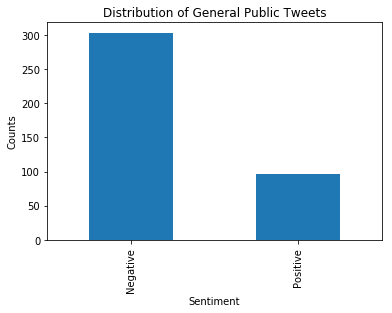

In [173]:
GeneralPublic['UserType'].value_counts()
GeneralPublic['Analysis'].replace(to_replace = 0, value = "Negative", inplace = True)
GeneralPublic['Analysis'].replace(to_replace = 1, value = "Positive", inplace = True)

                   
#plot and visualize the counts
plt.title('Distribution of General Public Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
CryptoGuru['Analysis'].value_counts().plot(kind='bar')
plt.show

In [146]:
positive_tweets = df.loc[df['Analysis']== 1]

In [182]:
import matplotlib.pyplot as plt 
import seaborn as sns

<function matplotlib.pyplot.show(*args, **kw)>

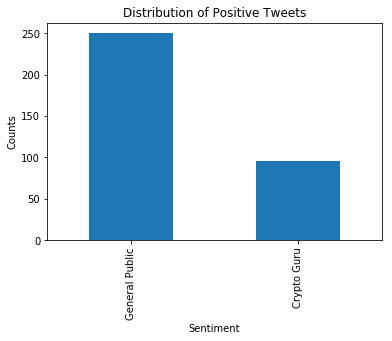

In [152]:
positive_tweets['UserType'].value_counts()

#plot and visualize the counts
plt.title('Distribution of Positive Tweets')

positive_tweets['UserType'].value_counts().plot(kind='bar')
plt.show

In [153]:
negative_tweets = df.loc[df['Analysis']== 0]

<function matplotlib.pyplot.show(*args, **kw)>

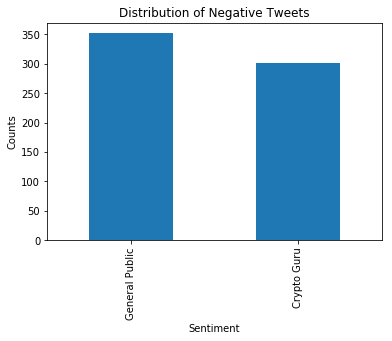

In [154]:
# Show the value counts
negative_tweets['UserType'].value_counts()

#plot and visualize the counts
plt.title('Distribution of Negative Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
negative_tweets['UserType'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

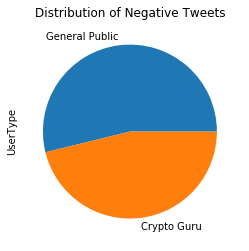

In [177]:
# Show the value counts
negative_tweets['UserType'].value_counts()

#plot and visualize the counts
plt.title('Distribution of Negative Tweets')
negative_tweets['UserType'].value_counts().plot(kind='pie')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

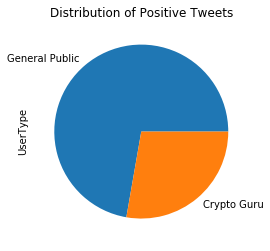

In [176]:
positive_tweets['UserType'].value_counts()

#plot and visualize the counts
plt.title('Distribution of Positive Tweets')

positive_tweets['UserType'].value_counts().plot(kind='pie')
plt.show

In [195]:
positive_tweetsdf = positive_tweets['UserType'].value_counts().rename_axis('UserType').reset_index(name='count')

In [196]:
positive_tweetsdf

,UserType,count
0,General Public,250
1,Crypto Guru,96


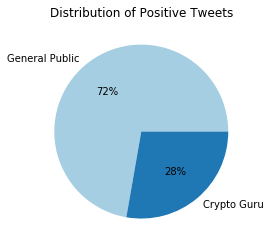

In [212]:
palette_color = sns.color_palette("Paired")
  
# plotting data on chart
plt.pie(positive_tweetsdf['count'], labels = positive_tweetsdf['UserType'] ,colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Positive Tweets')
plt.savefig('Distibution of positive tweets.png')
# displaying chart
plt.show()


In [208]:
negative_tweetsdf = negative_tweets['UserType'].value_counts().rename_axis('UserType').reset_index(name='count')


In [209]:
negative_tweetsdf

,UserType,count
0,General Public,352
1,Crypto Guru,302


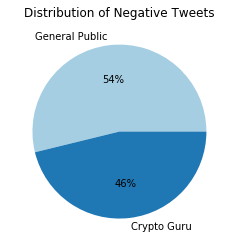

In [213]:
palette_color = sns.color_palette("Paired")
  
# plotting data on chart
plt.pie(negative_tweetsdf['count'], labels = negative_tweetsdf['UserType'] ,colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Negative Tweets')
plt.savefig('Distibution of negative tweets.png')

# displaying chart
plt.show()